# visualization related

## visual parameters

In [ ]:
# The style parameters control properties like the color of the background and whether a grid is enabled by default.
# sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("whitegrid")
params = {
'figure.figsize':(12,6),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'r',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.style.library)
# print(plt.rcParams['figure.figsize'])

## multiple plots

In [ ]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)

## plot labels

In [ ]:
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

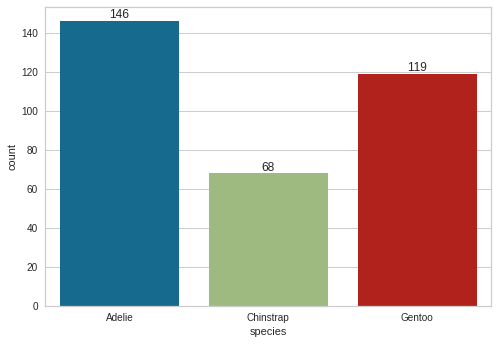

In [ ]:
ax = sns.countplot(x="species", data = df)
ax.bar_label(ax.containers[0]);

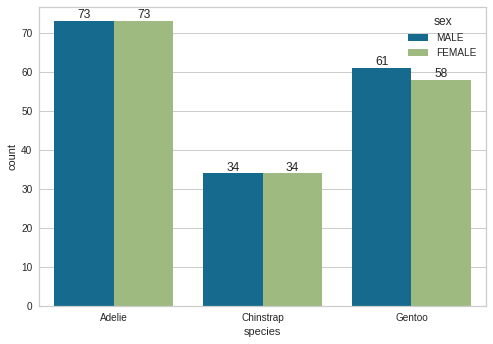

In [ ]:
ax = sns.countplot(x="species", hue="sex", data = df)
for p in ax.containers:
    ax.bar_label(p)

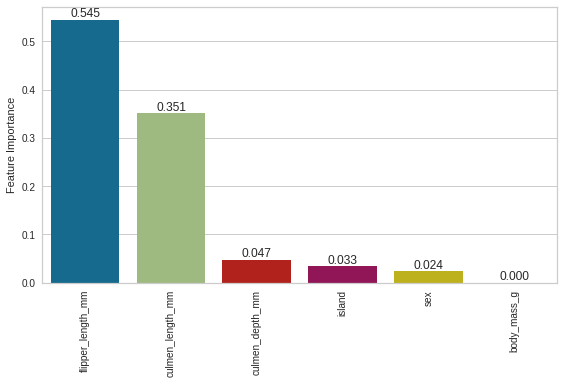

In [ ]:
ax = sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation = 90)
plt.tight_layout()

## 3D plotly

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_3d(df, 
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')
fig.show();

# Pandas

## combine hierarchical columns name

In [ ]:
df.columns = [f'{x}_{y}' for x,y in df.columns]

## duplike kolonları duplike satır gibi düş

In [ ]:
df = df.T.drop_duplicates().T
df.select_dtypes('O').describe().T

## unique values in object columns

for feature in df.columns:
    if df[feature].dtype=="object":
        print(df[feature].unique())